In [1]:
import numpy as np
import os
import glob
# import scipy.stats
# import matplotlib.pyplot as plt
# import matplotlib.lines
# import matplotlib as mpl
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# import sklearn.manifold
# import sklearn.decomposition
# import sklearn.cluster
# import sklearn.svm
# import h5py
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from matplotlib import cm
import pandas as pd

## Creating txt files for ANTs

In [2]:
def find_info_pair(name):
    #Outputs patient number, moving and fixed image scanID as strings for further analysis
    #Possible folder name pairs are below with each string differing in length
    # name = '101117_CL_Dev_004_CL_Dev_008'
    # name1 = '101117_CL_Dev_004_PS15_048'
    # name2 = '101117_PS15_048_CL_Dev_004'
    # name3 = '10097_PS15_048_PS17_017'

    #idx contains a list of strings of a given folder name
    idx = [s for s in name.split("_")]

    if len(idx) == 6:
        if 'CL' in idx[1]:
            mov = f'{idx[1]}_{idx[2]}_{idx[3]}'
            fix = f'{idx[4]}_{idx[5]}'
            p = f'{idx[0]}'
            return(p, mov, fix)
        elif 'PS' in idx[1]:
            mov = f'{idx[1]}_{idx[2]}'
            fix = f'{idx[3]}_{idx[4]}_{idx[5]}'
            p = f'{idx[0]}'
            return(p, mov, fix)

    elif len(idx) == 7:
        mov = f'{idx[1]}_{idx[2]}_{idx[3]}'
        fix = f'{idx[4]}_{idx[5]}_{idx[6]}'
        p = f'{idx[0]}'
        return(p, mov, fix)

    elif len(idx) == 5:
        mov = f'{idx[1]}_{idx[2]}'
        fix = f'{idx[3]}_{idx[4]}'
        p = f'{idx[0]}'
        return(p, mov, fix)

    elif len(idx) == 4:
        mov = f'{idx[1]}'
        fix = f'{idx[2]}_{idx[3]}'
        p = f'{idx[0]}'
        return(p, mov, fix)


    else:
        print('Not a corresponding folder name')

In [3]:
def ants_intra_reg(folder_path, folder_out):
    for f in glob.glob(f'{folder_path}*'):
        path_elements = [s for s in f.split("/")]
        folder = path_elements[-1] 
        folder = folder.replace('.nii.gz', '')
        p, mov, fix = find_info_pair(folder)
        out_path = f"{folder_out}intra/{mov}_{fix}/"
        if not os.path.exists(out_path):
            os.makedirs(out_path)
        os.system(f"antsRegistration -d 3 -m Demons[{folder_path}{p}_{mov}_{fix}/{fix}_dtype.nii.gz, {folder_path}{p}_{mov}_{fix}/{mov}_dtype.nii.gz, 1, 4] " \
            f"-t SyN[0.1, 3, 0] -f 2x1 -s 1x0vox -u 0 " \
            f"-c [10x5] -o [{out_path}movingToFixed, {out_path}movingToFixedDeformed.nii.gz] -v 1"
            )
        os.system(f"CreateJacobianDeterminantImage 3 {out_path}movingToFixed0Warp.nii.gz {out_path}jacobian.nii.gz 0 1")
        os.system(f"CreateJacobianDeterminantImage 3 {out_path}movingToFixed0Warp.nii.gz {out_path}logJacobian.nii.gz 1 1")

In [4]:
folders_path = "/media/andjela/SeagatePor/PairReg/rigid/images/"
folder_out = '/home/andjela/Documents/intra-inter-ddfs/'
ants_intra_reg(folders_path, folder_out)

All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS14_001_PS14_053/PS14_053_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS14_001_PS14_053/PS14_001_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55b822dc3240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS14_001_PS14_120/PS14_120_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS14_001_PS14_120/PS14_001_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x560046e86240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS14_001_PS15_061/PS15_061_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS14_001_PS15_061/PS14_001_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x5625415cd240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS14_001_PS15_138/PS15_138_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS14_001_PS15_138/PS14_001_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55914bcbe240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS14_053_PS14_120/PS14_120_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS14_053_PS14_120/PS14_053_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x557e2107f240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS14_053_PS15_061/PS15_061_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS14_053_PS15_061/PS14_053_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x563c229e5240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS14_053_PS15_138/PS15_138_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS14_053_PS15_138/PS14_053_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x561ab925c240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS14_120_PS15_061/PS15_061_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS14_120_PS15_061/PS14_120_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x5594d99f8240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS14_120_PS15_138/PS15_138_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS14_120_PS15_138/PS14_120_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55ddf8bd8240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS15_061_PS15_138/PS15_138_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10006_PS15_061_PS15_138/PS15_061_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x5562285f3240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10007_PS14_121_PS15_062/PS15_062_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10007_PS14_121_PS15_062/PS14_121_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x562a30f5c240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10007_PS14_121_PS15_139/PS15_139_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10007_PS14_121_PS15_139/PS14_121_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x5604204cf240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10007_PS15_062_PS15_139/PS15_139_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10007_PS15_062_PS15_139/PS15_062_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x56134c483240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS14_046_PS14_079/PS14_079_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS14_046_PS14_079/PS14_046_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55afc58b1240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS14_046_PS16_001/PS16_001_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS14_046_PS16_001/PS14_046_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x560362ec2240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS14_046_PS17_018/PS17_018_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS14_046_PS17_018/PS14_046_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x56336bf96240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS14_079_PS16_001/PS16_001_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS14_079_PS16_001/PS14_079_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55bac50a0240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS14_079_PS16_045/PS16_045_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS14_079_PS16_045/PS14_079_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55754ac93240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS14_079_PS17_018/PS17_018_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS14_079_PS17_018/PS14_079_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x563f726db240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS16_001_PS16_045/PS16_045_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS16_001_PS16_045/PS16_001_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x5608ba1cd240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS16_001_PS17_018/PS17_018_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS16_001_PS17_018/PS16_001_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x558bc86a5240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS16_045_PS17_018/PS17_018_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS16_045_PS17_018/PS16_045_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55db52ff1240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS14_070_PS15_002/PS15_002_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS14_070_PS15_002/PS14_070_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x561392aa6240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS14_070_PS15_092/PS15_092_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS14_070_PS15_092/PS14_070_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x5652de37f240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS14_070_PS16_020/PS16_020_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS14_070_PS16_020/PS14_070_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x5560e9c7a240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS14_070_PS16_072/PS16_072_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS14_070_PS16_072/PS14_070_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x563beb2c6240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS14_070_PS17_029/PS17_029_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS14_070_PS17_029/PS14_070_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55ca541fe240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS15_002_PS15_092/PS15_092_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS15_002_PS15_092/PS15_002_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55876d1d8240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS15_002_PS16_020/PS16_020_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS15_002_PS16_020/PS15_002_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55cd4990c240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS15_002_PS16_072/PS16_072_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS15_002_PS16_072/PS15_002_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55f3d70e5240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS15_092_PS16_020/PS16_020_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS15_092_PS16_020/PS15_092_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x5650b972c240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS15_092_PS16_072/PS16_072_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS15_092_PS16_072/PS15_092_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55964159c240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS15_092_PS17_029/PS17_029_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS15_092_PS17_029/PS15_092_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55e622497240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS16_020_PS16_072/PS16_072_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS16_020_PS16_072/PS16_020_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55d311eba240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS16_020_PS17_029/PS17_029_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS16_020_PS17_029/PS16_020_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55fb1049d240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS16_072_PS17_029/PS17_029_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS16_072_PS17_029/PS16_072_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55e101436240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_005_PS14_056/PS14_056_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_005_PS14_056/PS14_005_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x560d2a242240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_005_PS15_014/PS15_014_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_005_PS15_014/PS14_005_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x5616a5427240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_005_PS15_095/PS15_095_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_005_PS15_095/PS14_005_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x561a554f4240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_005_PS16_004/PS16_004_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_005_PS16_004/PS14_005_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55a59cf73240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_005_PS16_046/PS16_046_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_005_PS16_046/PS14_005_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55b3067e5240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_005_PS17_008/PS17_008_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_005_PS17_008/PS14_005_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x562bebe44240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_056_PS15_014/PS15_014_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_056_PS15_014/PS14_056_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x56517348f240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_056_PS15_095/PS15_095_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_056_PS15_095/PS14_056_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55976a10e240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_056_PS16_004/PS16_004_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_056_PS16_004/PS14_056_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55d22f065240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_056_PS17_008/PS17_008_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_056_PS17_008/PS14_056_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x558102cff240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS15_014_PS15_095/PS15_095_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS15_014_PS15_095/PS15_014_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55901f71b240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS15_014_PS16_004/PS16_004_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS15_014_PS16_004/PS15_014_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x564b2fb94240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS15_014_PS16_046/PS16_046_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS15_014_PS16_046/PS15_014_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x5633c2a4e240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS15_014_PS17_008/PS17_008_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS15_014_PS17_008/PS15_014_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x564eaa6fd240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS15_095_PS16_004/PS16_004_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS15_095_PS16_004/PS15_095_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x561209328240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS15_095_PS16_046/PS16_046_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS15_095_PS16_046/PS15_095_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55f39a000240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS15_095_PS17_008/PS17_008_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS15_095_PS17_008/PS15_095_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x56162f0c9240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS16_004_PS16_046/PS16_046_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS16_004_PS16_046/PS16_004_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x5650aa2e2240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS16_004_PS17_008/PS17_008_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS16_004_PS17_008/PS16_004_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55daac4e3240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS16_046_PS17_008/PS17_008_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS16_046_PS17_008/PS16_046_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55c84f04d240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10014_PS14_014_PS15_051/PS15_051_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10014_PS14_014_PS15_051/PS14_014_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55f7fe781240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10014_PS14_014_PS15_112/PS15_112_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10014_PS14_014_PS15_112/PS14_014_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x559806c39240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10014_PS14_014_PS16_030/PS16_030_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10014_PS14_014_PS16_030/PS14_014_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55ce6f88e240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10014_PS15_051_PS15_112/PS15_112_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10014_PS15_051_PS15_112/PS15_051_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x564b66346240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS14_046_PS16_045/PS16_045_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10008_PS14_046_PS16_045/PS14_046_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55556b29f240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS15_002_PS17_029/PS17_029_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10009_PS15_002_PS17_029/PS15_002_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55730d403240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_056_PS16_046/PS16_046_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10010_PS14_056_PS16_046/PS14_056_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55e0c0b6c240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10014_PS15_051_PS16_030/PS16_030_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10014_PS15_051_PS16_030/PS15_051_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x555a3a788240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10021_PS14_018_PS16_031/PS16_031_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10021_PS14_018_PS16_031/PS14_018_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x558d5309f240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10022_PS14_094_PS15_049/PS15_049_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10022_PS14_094_PS15_049/PS14_094_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x560f8ab80240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10032_PS15_121_PS16_037/PS16_037_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10032_PS15_121_PS16_037/PS15_121_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55ca079e5240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10047_PS14_044_PS16_018/PS16_018_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10047_PS14_044_PS16_018/PS14_044_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55b2116ce240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10054_PS14_110_PS15_057/PS15_057_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10054_PS14_110_PS15_057/PS14_110_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55eb791aa240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10057_PS14_057_PS14_113/PS14_113_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10057_PS14_057_PS14_113/PS14_057_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x5648d4ccf240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10061_PS14_060_PS14_123/PS14_123_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10061_PS14_060_PS14_123/PS14_060_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x56505f73d240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10064_PS14_067_PS16_085/PS16_085_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10064_PS14_067_PS16_085/PS14_067_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55a9834df240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10073_PS15_013_PS15_086/PS15_086_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10073_PS15_013_PS15_086/PS15_013_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x564d9f357240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10079_PS15_029_PS17_056/PS17_056_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10079_PS15_029_PS17_056/PS15_029_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x560a54ba1240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10083_PS15_053_PS16_051/PS16_051_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10083_PS15_053_PS16_051/PS15_053_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55a94b131240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10087_PS14_105_PS16_038/PS16_038_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10087_PS14_105_PS16_038/PS14_105_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55d2e54b5240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10089_PS14_104_PS15_097/PS15_097_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10089_PS14_104_PS15_097/PS14_104_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x56061b52f240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10090_PS16_067_PS17_031/PS17_031_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10090_PS16_067_PS17_031/PS16_067_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55f1cdb7a240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10096_PS15_131_PS16_076/PS16_076_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10096_PS15_131_PS16_076/PS15_131_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x555b56dff240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10098_PS14_118_PS16_070/PS16_070_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10098_PS14_118_PS16_070/PS14_118_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55e0e7d79240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10109_PS16_033_PS16_078/PS16_078_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10109_PS16_033_PS16_078/PS16_033_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55d865ace240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10117_CL_Dev_005_CL_Dev_008/CL_Dev_008_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10117_CL_Dev_005_CL_Dev_008/CL_Dev_005_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55fb3f439240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10117_CL_Dev_008_CL_Dev_012/CL_Dev_012_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10117_CL_Dev_008_CL_Dev_012/CL_Dev_008_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x557d1c126240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10117_CL_Dev_015_PS15_081/PS15_081_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10117_CL_Dev_015_PS15_081/CL_Dev_015_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x561c0cc49190)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]


terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10121_PS17_016_PS17_051/PS17_051_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10121_PS17_016_PS17_051/PS17_016_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x5610f1254240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10014_PS15_112_PS16_030/PS16_030_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10014_PS15_112_PS16_030/PS15_112_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x55ae18280240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10015_PS14_015_PS15_066/PS15_066_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10015_PS14_015_PS15_066/PS14_015_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x56301837b240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10020_PS14_073_PS15_032/PS15_032_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10020_PS14_073_PS15_032/PS14_073_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x562645879240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10020_PS14_073_PS15_116/PS15_116_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10020_PS14_073_PS15_116/PS14_073_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x559e5013a240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10020_PS14_073_PS16_028/PS16_028_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10020_PS14_073_PS16_028/PS14_073_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x5613b07fd240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)
terminate called after throwing an instance of 'itk::ImageFileReaderException'
  what():  /home/andjela/build/staging/include/ITK-5.4/itkImageFileReader.hxx:132:
 Could not create IO object for reading file movingToFixed0Warp.nii.gz
The file doesn't exist. 
Filename = movingToFixed0Warp.nii.gz

Aborted (core dumped)


All_Command_lines_OK
Using double precision for computations.
  number of levels = 2
  fixed image: /media/andjela/SeagatePor/PairReg/rigid/images/10020_PS14_073_PS17_013/PS17_013_dtype.nii.gz
  moving image: /media/andjela/SeagatePor/PairReg/rigid/images/10020_PS14_073_PS17_013/PS14_073_dtype.nii.gz
Dimension = 3
Number of stages = 1
Use histogram matching = false
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Demons
     Fixed image = Image (0x5587d5137240)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 491
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Si

## Inspecting ANTs h5 files

In [26]:
transfo = 'rigid'
folder_path = f'/media/andjela/SeagatePor/PairReg/{transfo}/images/'
folder_names = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]
for folder in folder_names[0:4]:
    print('-----------------------------------------------------------------------------------------------')
    print('Folder:', folder)
    data_path = f'/media/andjela/SeagatePor/PairReg/{transfo}/images/{folder}/mov2fix_Composite.h5' 
    data = h5py.File(data_path, 'r')
    print(np.array(data), np.array(data).shape)
    print(np.array(data['TransformGroup']))
    print(np.array(data['TransformGroup']['0']))
    print(np.array(data['TransformGroup']['1']))
    print('TransformType:', np.array(data['TransformGroup']['0']['TransformType']))
    print('TransformFixedParameters:', np.array(data['TransformGroup']['1']['TransformFixedParameters']))
    print('TransformParameters:', np.array(data['TransformGroup']['1']['TransformParameters']))
    print('TransformType:', np.array(data['TransformGroup']['1']['TransformType']))

-----------------------------------------------------------------------------------------------
Folder: 10006_PS14_001_PS14_053
['HDFVersion' 'ITKVersion' 'OSName' 'OSVersion' 'TransformGroup'] (5,)
['0' '1']
['TransformType']
['TransformFixedParameters' 'TransformParameters' 'TransformType']
TransformType: [b'CompositeTransform_double_3_3']
TransformFixedParameters: [0. 0. 0.]
TransformParameters: [ 9.71583809e-01  2.22559247e-01 -8.05747130e-02 -2.17706923e-01
  9.73860738e-01  6.47993688e-02  9.28902482e-02 -4.54163447e-02
  9.94640014e-01  1.77645668e+00  3.68941064e+00  5.30800366e+01]
TransformType: [b'AffineTransform_double_3_3']
-----------------------------------------------------------------------------------------------
Folder: 10006_PS14_001_PS14_120
['HDFVersion' 'ITKVersion' 'OSName' 'OSVersion' 'TransformGroup'] (5,)
['0' '1']
['TransformType']
['TransformFixedParameters' 'TransformParameters' 'TransformType']
TransformType: [b'CompositeTransform_double_3_3']
TransformFi

In [27]:
transfo = 'rigid_affine_corr'
folder_path = f'/media/andjela/SeagatePor/PairReg/{transfo}/images/'
folder_names = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]
for folder in folder_names[0:4]:
    print('-----------------------------------------------------------------------------------------------')
    print('Folder:', folder)
    data_path = f'/media/andjela/SeagatePor/PairReg/{transfo}/images/{folder}/mov2fix_Composite.h5' 
    data = h5py.File(data_path, 'r')
    print(np.array(data), np.array(data).shape)
    print(np.array(data['TransformGroup']))
    print(np.array(data['TransformGroup']['0']))
    print(np.array(data['TransformGroup']['1']))
    print('TransformType:', np.array(data['TransformGroup']['0']['TransformType']))
    print('TransformFixedParameters:', np.array(data['TransformGroup']['1']['TransformFixedParameters']))
    print('TransformParameters:', np.array(data['TransformGroup']['1']['TransformParameters']))
    print('TransformType:', np.array(data['TransformGroup']['1']['TransformType']))

-----------------------------------------------------------------------------------------------
Folder: 10006_PS14_001_PS14_053
['HDFVersion' 'ITKVersion' 'OSName' 'OSVersion' 'TransformGroup'] (5,)
['0' '1']
['TransformType']
['TransformFixedParameters' 'TransformParameters' 'TransformType']
TransformType: [b'CompositeTransform_float_3_3']
TransformFixedParameters: [ -1.07445347 -24.63658333  -9.70702171]
TransformParameters: [ 9.6798152e-01  2.2197942e-01 -8.0753349e-02 -2.1604988e-01
  9.7003019e-01  7.1354732e-02  9.5194302e-02 -4.5534011e-02
  9.9187076e-01 -2.8038368e+00  3.8128664e+00  5.4199341e+01]
TransformType: [b'AffineTransform_float_3_3']
-----------------------------------------------------------------------------------------------
Folder: 10006_PS14_001_PS14_120
['HDFVersion' 'ITKVersion' 'OSName' 'OSVersion' 'TransformGroup'] (5,)
['0' '1']
['TransformType']
['TransformFixedParameters' 'TransformParameters' 'TransformType']
TransformType: [b'CompositeTransform_float_3_

['sub-001' 'sub-002' 'sub-003' 'sub-004' 'sub-005' 'sub-006' 'sub-007'
 'sub-008' 'sub-009' 'sub-010' 'sub-011' 'sub-012' 'sub-013' 'sub-014'
 'sub-015' 'sub-016' 'sub-017' 'sub-018' 'sub-019' 'sub-020' 'sub-021'
 'sub-022' 'sub-023' 'sub-024' 'sub-025' 'sub-026' 'sub-027' 'sub-028'
 'sub-029' 'sub-030' 'sub-031' 'sub-032' 'sub-033' 'sub-034' 'sub-035'
 'sub-036' 'sub-037' 'sub-038' 'sub-039' 'sub-040' 'sub-041' 'sub-042'
 'sub-043' 'sub-044' 'sub-045' 'sub-046' 'sub-047' 'sub-048' 'sub-049'
 'sub-050' 'sub-051' 'sub-052' 'sub-053' 'sub-054' 'sub-055' 'sub-056'
 'sub-057' 'sub-058' 'sub-059' 'sub-060' 'sub-061' 'sub-062' 'sub-063'
 'sub-064'] (64,)
sub-001 5
['sub-001_ses-001_rigid_T1w_128.nii.gz'
 'sub-001_ses-002_rigid_T1w_128.nii.gz'
 'sub-001_ses-003_rigid_T1w_128.nii.gz'
 'sub-001_ses-004_rigid_T1w_128.nii.gz'
 'sub-001_ses-005_rigid_T1w_128.nii.gz']
234


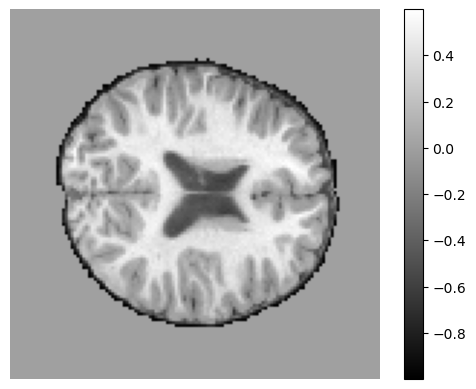

In [137]:
size = '128'
data_format = f'uncrop_{size}'
data_path = f'/media/andjela/SeagatePor1/LSSL/data/{data_format}/CP_longitudinal_img.h5' 
data = h5py.File(data_path, 'r')
print(np.array(data), np.array(data).shape)
sub_1 = np.array(data['sub-001'])
print('sub-001', int(sub_1.shape[0]))
print(np.array(data['sub-001']))

count = 0
for sub in list(np.array(data)):
    count += int(np.array(data[f'{sub}']).shape[0])
print(count)

img = np.array(data['sub-001'][f'sub-001_ses-003_rigid_T1w_{size}.nii.gz'])
# Extract the slice from the image data
slice_index = 64
slice_data_img = img[:, :, slice_index]
# Plot the slice using Matplotlib
plt.imshow(slice_data_img, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

In [22]:
# label_raw = np.array(data['label']).astype(int)
# label_raw = (label_raw > 0).astype(int)
z1_raw = np.array(data['z1'])
z2_raw = np.array(data['z2'])
interval_raw = np.array(data['interval'])
age_raw = np.array(data['age'])
delta_z_raw = (z2_raw - z1_raw) / np.expand_dims(interval_raw, 1) #speed of brain aging; z2-z1/delta(t)

# label_raw_train = np.array(data_train['label']).astype(int)
# label_raw_train = (label_raw_train > 0).astype(int)
z1_raw_train = np.array(data_train['z1'])
z2_raw_train = np.array(data_train['z2'])
interval_raw_train = np.array(data_train['interval'])
age_raw_train = np.array(data_train['age'])
delta_z_raw_train = (z2_raw_train - z1_raw_train) / np.expand_dims(interval_raw_train, 1)

print('Speed of brain aging \n', 'test', delta_z_raw.shape, 'train', delta_z_raw_train.shape)

Speed of brain aging 
 test (38, 4096) train (318, 4096)


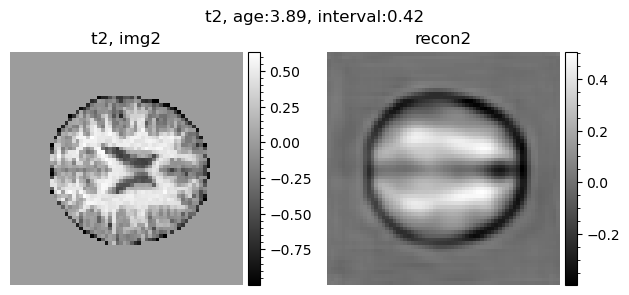

In [23]:
# Verify how image is reconstructed using training data
img_1_train = np.array(data_train['img1'])
img_2_train = np.array(data_train['img2'])
age_train = np.array(data_train['age'])
interval_train = np.array(data_train['interval'])
recon_1_train = np.array(data_train['recon1'])
recon_2_train = np.array(data_train['recon2'])
z_1 = np.array(data_train['z1'])
z_2 = np.array(data_train['z2'])

# print(np.squeeze(img_2_train).shape) #(280, 128, 128, 128)
# Extract the slice from the image data
slice_index = 32
sub_index = 70
slice_data_img = np.squeeze(img_2_train)[sub_index, :, :, slice_index]
slice_data_recon = np.squeeze(recon_2_train)[sub_index, :, :, slice_index]
# Plot the slice using Matplotlib
fig, axs = plt.subplots(1,2, sharex=True, sharey=True)
fig.suptitle(f't2, age:{np.round(age_train[sub_index]+interval_train[sub_index], 2)}, interval:{np.round(interval_train[sub_index]+0,2)}', y=0.8)
plt1 = axs[0].imshow(slice_data_img, cmap='gray')
plt2 = axs[1].imshow(slice_data_recon, cmap='gray')
add_colorbar(plt1)
add_colorbar(plt2)

axs[0].axis('off')
axs[0].title.set_text('t2, img2')
axs[1].axis('off')
axs[1].title.set_text('recon2')
fig.tight_layout()
# plt.imshow(slice_data_img, cmap='gray')
# plt.colorbar()
# plt.axis('off')
# plt.show()
# plt.imshow(slice_data_recon, cmap='gray')
# plt.colorbar()
# plt.axis('off')
# plt.show()